###  Supervised learning on MNIST- Fashion Dataset - Logistic Regression using pytorch

In [11]:
# importing essential libraries

import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import timeit

### Reproducibility and Readability
To ensure reproducibility of the results, a seed value is set in appropriate cells. This is done to avoid running the entire sheet from the beginning each time while writing the code for different sections.
Comments are also included in relavent cells to describe the code.

In [12]:
# checking for Fashion-MNIST dataset in the torchvision.datasets module
print(dir(datasets))

['CIFAR10', 'CIFAR100', 'Caltech101', 'Caltech256', 'CelebA', 'Cityscapes', 'CocoCaptions', 'CocoDetection', 'DatasetFolder', 'EMNIST', 'FakeData', 'FashionMNIST', 'Flickr30k', 'Flickr8k', 'HMDB51', 'ImageFolder', 'ImageNet', 'KMNIST', 'Kinetics400', 'LSUN', 'LSUNClass', 'MNIST', 'Omniglot', 'PhotoTour', 'Places365', 'QMNIST', 'SBDataset', 'SBU', 'SEMEION', 'STL10', 'SVHN', 'UCF101', 'USPS', 'VOCDetection', 'VOCSegmentation', 'VisionDataset', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'caltech', 'celeba', 'cifar', 'cityscapes', 'coco', 'fakedata', 'flickr', 'folder', 'hmdb51', 'imagenet', 'kinetics', 'lsun', 'mnist', 'omniglot', 'phototour', 'places365', 'sbd', 'sbu', 'semeion', 'stl10', 'svhn', 'ucf101', 'usps', 'utils', 'video_utils', 'vision', 'voc']


#### Data Loading 

In [18]:
# Loading Training and Testing datasets from torchvision.datasets module with image normalization:
transform_data = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))]) 
# the dataset images are Grayscale, the number of channels will be 1. So a single value for mean and std.deviation has been 
# assigned in transforms.Normalize

train_data_T = datasets.FashionMNIST(root = './data', download = False,  # set True to download the data
                                     train = True, transform = transform_data)

test_data_T = datasets.FashionMNIST(root = './data', download = False, 
                                    train = False, transform = transform_data)

###### Image data exploration

In [19]:
# Number of instances in training and test data
print(train_data_T)
print(test_data_T)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )
Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )


In [21]:
type(train_data_T)

torchvision.datasets.mnist.FashionMNIST

In [22]:
# Target classes
print(train_data_T.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [23]:
# Map of target classes to index 
print(train_data_T.class_to_idx)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


In [24]:
# Number of instances present in each class
print(train_data_T.targets.bincount()) 

# from the below tensor it can be seen that the number of instances are same for
# all the classes in the dataset. So the dataset is uniformly distributed.

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


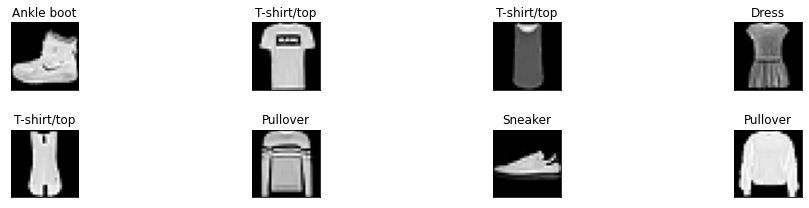

In [27]:
# Printing out a few images from the training data - just for visualisation:
iterator = iter(train_data_T)
image, label = next(iterator)

plt.figure(figsize = (15, 3))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    image = image*0.5 + 0.5
    plt.imshow(image.permute(1,2,0).squeeze(), cmap = "gray")
    plt.title(train_data_T.classes[label])
    image,label = next(iterator)
plt.tight_layout(h_pad=2)
plt.show()

##### Creating dataloaders

In [26]:
batchsize = 10
torch.manual_seed(1748471)

# Loaders for data with normalization
train_data_T_loader = torch.utils.data.DataLoader(train_data_T, shuffle = True, batch_size = batchsize, num_workers = 2)
test_data_T_loader = torch.utils.data.DataLoader(test_data_T, shuffle = False, batch_size = batchsize, num_workers = 2)

#### Displaying atleast eight images for each of the 10 classes:

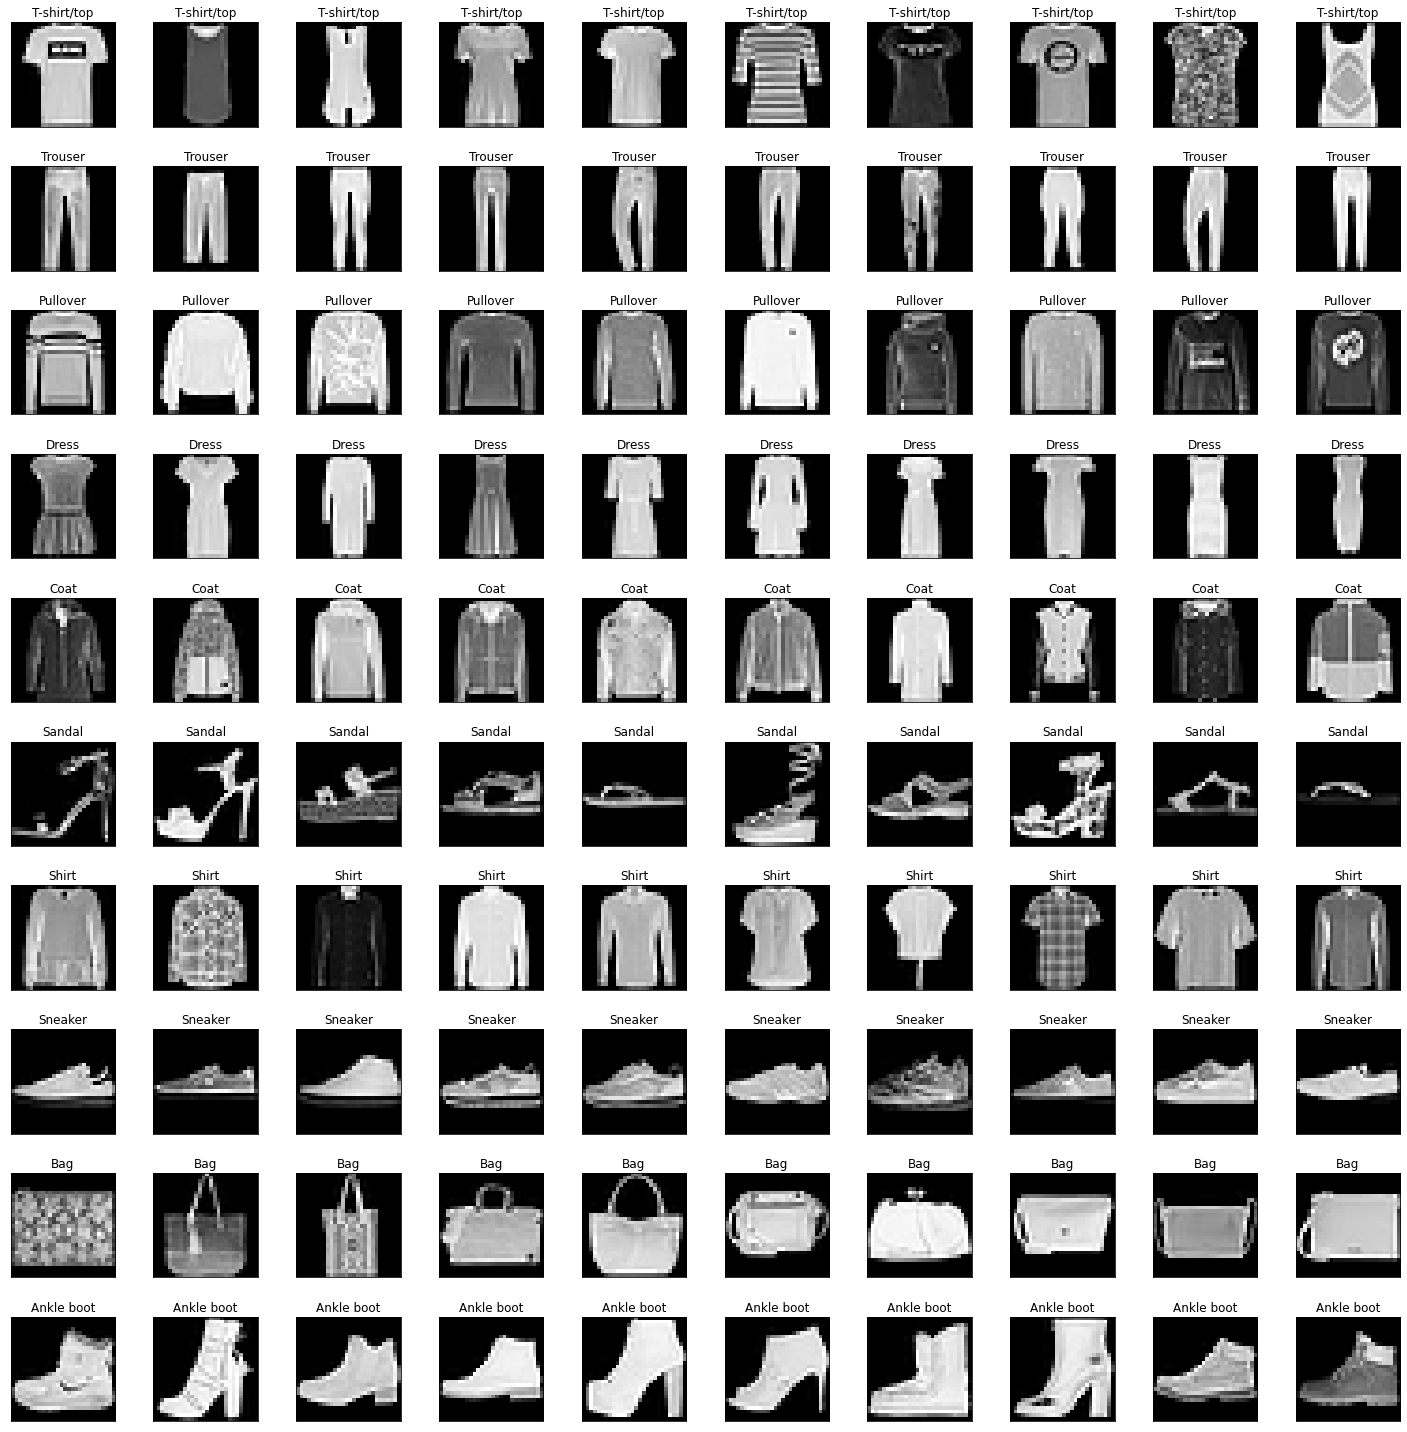

In [29]:
# Creating an empty dictionary and initialising it with empty list that can hold image tensors for each of 
# the 10 classes(from class 0 to class 9): 
count_dict = {}
position_dict = {}

for i in range(10):
    position_dict[i] = []
    count_dict[i]  = 0   

# Creating an iter variable that iterates through the train_data
iterator = iter(train_data_T)
image, label = next(iterator)

# Appending atleast 10 image tensors for each of the 10 classes: 
while True in (np.array(list(count_dict.values())) < 10):
    count_dict[label] += 1
    position_dict[label].append(image)
    image, label = next(iterator)  

# Printing the list of image tensors stored in the position_dict: 
plt.figure(figsize = (20, 20))

for i in range(10):
    j = 0
    while(j<10):
        plt.subplot(10,10,(i*10+j+1))
        plt.xticks([])
        plt.yticks([])
        image = image*0.5 + 0.5
        plt.imshow(position_dict[i][j].permute(1,2,0).squeeze(), cmap = "gray")
        plt.title(train_data_T.classes[i])
        j+=1
        
plt.tight_layout(h_pad=2)
plt.show()


#### Evaluation metrics 
Training accuracy, testing accuracy, number of learnable parameters and training time are determined for the Logistic Regression models. They can be found in the following section

#### Logistic Regression

In [31]:
# Creating a Logistic Regression Module

class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(784,10) # 784 is used because each Fashion-MNIST PIL image has 28x28 pixel(data points)
    
    def forward(self,x):
        pred = self.linear(x)
        return pred

###### Creating three Logistic regression models with  l1 regularistion and l2 regularisation
Same seed value has been assigned for all three so that they are initially created with the same parameter values for weights and biases

In [33]:
torch.manual_seed(1748471)
LogReg1 = LogisticRegression()

In [34]:
torch.manual_seed(1748471)
LogReg2 = LogisticRegression()

##### Function for training the Logistic regression model

In [36]:
def training_fn(epoc, criteria, optimiser, model, loader, data):
    print(data)
    
    if model == LogReg1:
        l1 = nn.L1Loss()
        
    start = timeit.default_timer() # Starting the timer
    for iteration in range(epoc):
        loss_tracking = 0
        for i,j in enumerate(loader):
            image, label = j # loading a batch of input train data
            optimiser.zero_grad()
            predictions = model(image.view(-1, 784))
            loss = criteria(predictions, label)
            
            if model == LogReg1:
                temp = 0
                for params in LogReg1.parameters():
                    temp += l1(params, target = torch.zeros_like(params))
                factor = 0.00005
                loss += factor*temp
            
            loss.backward() # back propogating the losses
            optimiser.step()
            
            loss_tracking += loss.item() # Computing the average loss for 2000 iterations
            if i%2000 == 0:
                print('epoch:',iteration,'\t','instance:',i,'\t','Avg loss:',loss_tracking/2000)
                loss_tracking = 0
                
    print("Training is done!\n")
    
    # Determining the time taken to train the model
    total_time = timeit.default_timer() - start
    print("Model training time:", total_time) 
    
    # Determining the learnable parameters in the model
    no_of_para = 0
    for i in list(model.parameters()):
        no_of_para += torch.tensor(i.size()).prod().item()
    print("No of Model parameters:",no_of_para)  
    
    return(total_time, no_of_para)

##### Function for testing the prediction accuracy of logistic regression model

In [37]:
def testing_fn(model, loader, data):
    actual = []
    prediction = []
    torch.manual_seed(1748471)
    correct_predictions = 0
    total_predictions = 0
    with torch.no_grad(): # Setting nograd to prevent unnecessary loss of computational time and memory. 
        for i in loader:
            image, label = i
            test_out = model(image.view(-1,784))
            _, test_prediction_index = torch.max(test_out.data, 1)# getting the max prediction values 
# and their indexes for a batch of data
            total_predictions += label.size(0)
            
            correct_predictions += (test_prediction_index == label).sum().item() # calculating the total number
# of correct predictions
            actual.extend(label)
            prediction.extend(test_prediction_index)
   
    acc = correct_predictions / total_predictions*100    
    print(data,acc,'%')
    return (actual, prediction, acc)

##### Function for plotting the confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

def con_matrix(true_list, pre_list, title):
    con_df = pd.DataFrame(confusion_matrix(true_list, pre_list), columns = train_data_T.classes, index = train_data_T.classes)
    plt.figure(figsize = (10,5))
    plt.title(title)
    sns.heatmap(con_df, annot = True, fmt = "d")

#### L1 regularisation

training LogReg1 model

epoch: 0 	 instance: 0 	 Avg loss: 0.0004905171692371369
epoch: 0 	 instance: 2000 	 Avg loss: 0.47187111266423015
epoch: 0 	 instance: 4000 	 Avg loss: 0.4484851209335029
Training is done!

Model training time: 23.640348127999914
No of Model parameters: 7850
Prediction accuracy for training data: 83.44500000000001 %
Prediction accuracy for test data: 81.75 %


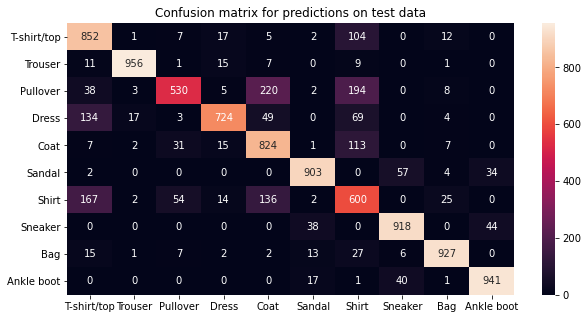

In [42]:
# Since we have more than 2 classes softmax function has to be applied to get the predictions. 
# nn.CrossEntropyLoss combines the nn.LogSoftmax() and nn.NLLLoss() in one single class.

criterion1 = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(LogReg1.parameters(), lr=0.001, momentum=0.9) 
epoch = 1
data = "training LogReg1 model\n"

# calling the training function
time_LogReg1, para_LogReg1 = training_fn(epoch, criterion1, optimizer1, LogReg1, train_data_T_loader, data)

# Testing the Logistic regression model on train data(part a)
data = "Prediction accuracy for training data:"
_,_, train_acc_LogReg1 = testing_fn(LogReg1, train_data_T_loader, data)

# Testing the Logistic regression model on test data(part a)
data = "Prediction accuracy for test data:"
actual, prediction, test_acc_LogReg1 = testing_fn(LogReg1, test_data_T_loader, data)
title = "Confusion matrix for predictions on test data"
con_matrix(actual, prediction, title)

#### L2 regularisation

training LogReg2 model

epoch: 0 	 instance: 0 	 Avg loss: 0.0011807523965835572
epoch: 0 	 instance: 2000 	 Avg loss: 0.62228681107983
epoch: 0 	 instance: 4000 	 Avg loss: 0.512650362631306
Training is done!

Model training time: 23.191914430999987
No of Model parameters: 7850
Prediction accuracy for training data: 83.40333333333334 %
Prediction accuracy for test data: 81.55 %


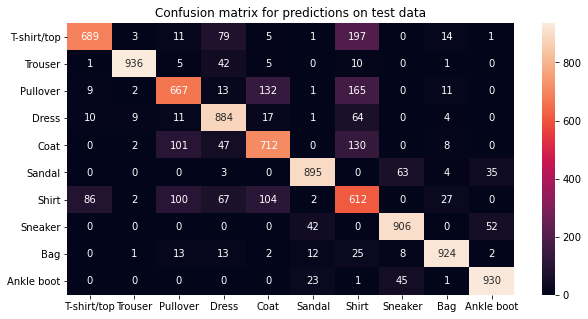

In [45]:
# Since we have more than 2 classes softmax function has to be applied to get the predictions. 
# nn.CrossEntropyLoss combines the nn.LogSoftmax() and nn.NLLLoss() in one single class.

criterion2 = nn.CrossEntropyLoss()
# Assigning value for weight_decay in optim.SGD will include l2 regularisation
optimizer2 = optim.SGD(LogReg2.parameters(), lr=0.001, momentum=0.9, weight_decay = 0.003)  
epoch = 1
data = "training LogReg2 model\n"

# calling the training function
time_LogReg2, para_LogReg2 = training_fn(epoch, criterion2, optimizer2, LogReg2, train_data_T_loader, data)

# Testing the Logistic regression model on train data(part a)
data = "Prediction accuracy for training data:"
_,_,train_acc_LogReg2 = testing_fn(LogReg2, train_data_T_loader, data)

# Testing the Logistic regression model on test data(part a)
data = "Prediction accuracy for test data:"
actual, prediction, test_acc_LogReg2 = testing_fn(LogReg2, test_data_T_loader, data)
title = "Confusion matrix for predictions on test data"
con_matrix(actual, prediction, title)

#### Consolidating the performance metrics

In [46]:
# Creating a dataframe of the performance metrics
column_name = ["l1","l2",]
row_name = ["Training_acc", "Testing_acc", "Training_time", "No_of_parameters"]

perf_matrix = np.array([[train_acc_LogReg1, train_acc_LogReg2],\
                       [test_acc_LogReg1, test_acc_LogReg2 ],\
                       [time_LogReg1, time_LogReg2],\
                       [para_LogReg1, para_LogReg2]])
perf_df = pd.DataFrame(perf_matrix, columns = column_name, index = row_name)

In [50]:
perf_df

,l1,l2
Training_acc,83.445000,83.403333
Testing_acc,81.750000,81.550000
Training_time,23.640348,23.191914
No_of_parameters,7850.000000,7850.000000


#### Plotting the performance metrics

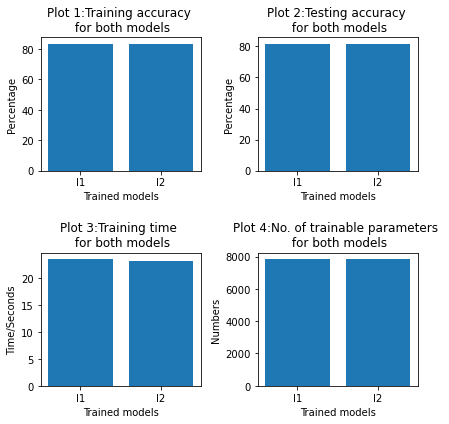

In [49]:
# Training Accuracy
plt.figure(figsize = (6,6))
plt.subplot(2,2,1)
plt.title("Plot 1:Training accuracy \n for both models")
plt.xlabel("Trained models")
plt.ylabel("Percentage")
plt.bar(column_name, perf_df.loc["Training_acc"])

#Testing Accuracy
plt.subplot(2,2,2)
plt.title("Plot 2:Testing accuracy \n for both models")
plt.xlabel("Trained models")
plt.ylabel("Percentage")
plt.bar(column_name, perf_df.loc["Testing_acc"])

# Time taken for learning
plt.subplot(2,2,3)
plt.title("Plot 3:Training time \n for both models")
plt.xlabel("Trained models")
plt.ylabel("Time/Seconds")
plt.bar(column_name, perf_df.loc["Training_time"])

# No. of learnable parameters
plt.subplot(2,2,4)
plt.title("Plot 4:No. of trainable parameters \n for both models")
plt.xlabel("Trained models")
plt.ylabel("Numbers")
plt.bar(column_name, perf_df.loc["No_of_parameters"])
plt.tight_layout(h_pad = 2)
plt.show()

The four classes namely "shirts", "T-shirts\top","coat", and "pullovers" look similar to one another and it is evident from the images displayed above. They share a similar pixel distributions. So there might a chance for them to get misclassified with respect to one another. This is evident from the the confusion matrix plotted for both the models